In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip3 install folium
!pip3 install wget
!pip3 install pandas dash
import folium
import wget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0af78456186fcec319c8d3bebdc2c75c586c86bd8bdbf3480cbb61a901dfb730
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.2 MB/s 
     |████████████████████████████████| 357 kB 42.1 MB/s 


In [3]:
wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py")

'spacex_dash_app.py'

In [4]:
spacex_csv_file = wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
data = pd.read_csv(spacex_csv_file)
data.columns


Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')

In [5]:
data.describe()

,Unnamed: 0,Flight Number,class,Payload Mass (kg)
count,56.000000,56.000000,56.000000,56.000000
mean,27.500000,28.500000,0.428571,3696.648214
std,16.309506,16.309506,0.499350,2568.509679
min,0.000000,1.000000,0.000000,0.000000
25%,13.750000,14.750000,0.000000,2121.000000
50%,27.500000,28.500000,0.000000,3412.500000
75%,41.250000,42.250000,1.000000,5042.500000
max,55.000000,56.000000,1.000000,9600.000000


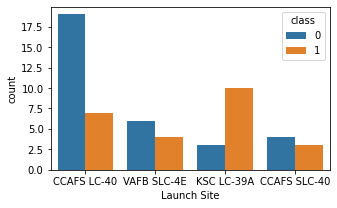

In [6]:

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Launch Site', hue='class')
plt.show()

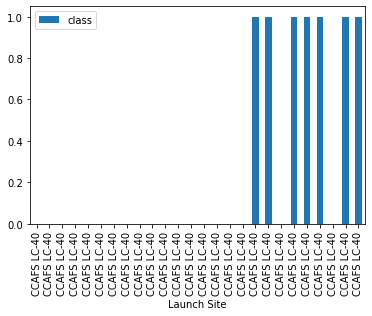

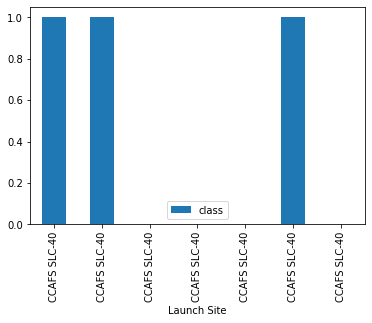

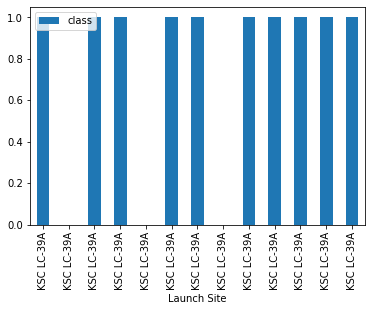

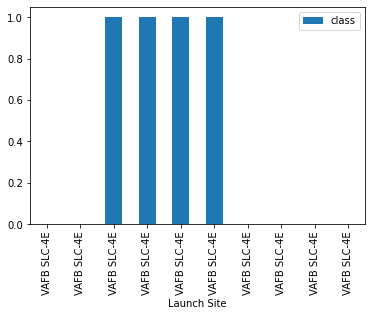

In [16]:
df = data.groupby('Launch Site')
ax = df.plot.bar(x='Launch Site', y = 'class')

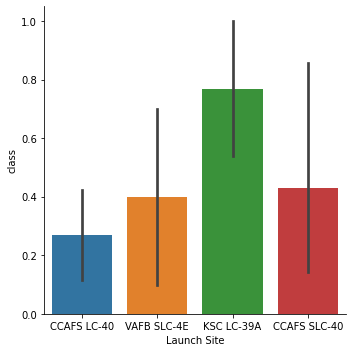

In [19]:
g = sns.catplot(x='Launch Site', y='class', kind='bar', data=data)

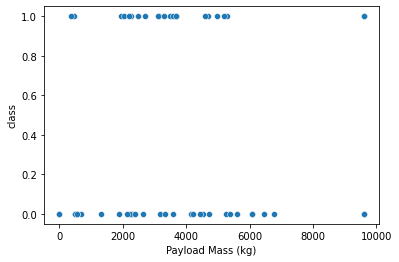

In [25]:
sns.scatterplot(data=data, x="Payload Mass (kg)", y="class")

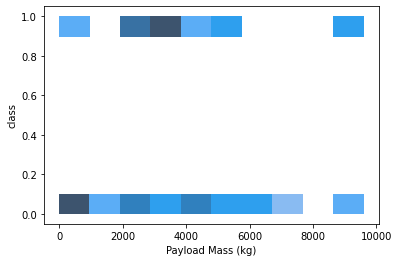

In [45]:
z = sns.histplot(data=data, x="Payload Mass (kg)", y="class", bins=10, common_bins=True)

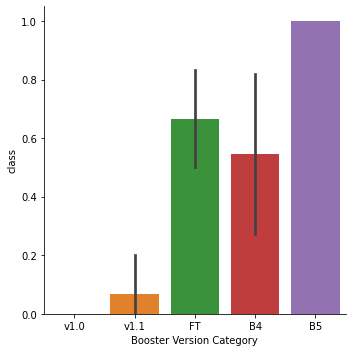

In [27]:
x = sns.catplot(x='Booster Version Category', y='class', kind='bar', data=data)

In [ ]:
data.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [ ]:
data['Launch Site'].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)

In [ ]:
from dash import Dash, dcc, html, Input, Output

In [ ]:
 dcc.Dropdown(id='Launch Site',
                options=[
                    {'label': 'All Sites', 'value': 'ALL'},
                    {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                    {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                    {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                    {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                ],
                value='ALL',
                placeholder="place holder here",
                searchable=True
                ),

(Dropdown(options=[{'label': 'All Sites', 'value': 'ALL'}, {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'}, {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'}, {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'}, {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}], value='ALL', searchable=True, placeholder='place holder here', id='Launch Site'),)

In [ ]:
dcc.RangeSlider(id='payload-slider',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       100: '100'},
                value=[min_value, 9600])

In [ ]:
!pip install dash_bootstrap_components

import dash
from dash import dcc
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [ ]:
import dash

app = dash.Dash()

# Title the app.
app.title = "Bigfoot Sightings"

In [ ]:
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(data, values='class', 
        names='pie chart names', 
        title='title')
        return fig
    else:
        # return the outcomes piechart for a selected site

SyntaxError: ignored

In [ ]:
dcc.RangeSlider(id='id',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       100: '100'},
                value=[0, 9600])

RangeSlider(min=0, max=10000, step=1000, marks={0: '0', 100: '100'}, value=[0, 9600], id='id')

In [ ]:
import dash

app = dash.Dash()

# Title the app.
app.title = "Launch Sites"

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
